<a href="https://colab.research.google.com/github/jarodriguezf/Competitions/blob/main/EDA_ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from google.colab import files
import imageio
import random
%matplotlib inline

In [2]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cambiamos el directorio de trabajo, hasta la carpeta ASL_Alphabet (Raiz del proyecto)
%cd /content/drive/MyDrive/ASL_Alphabet/

/content/drive/MyDrive/ASL_Alphabet


In [106]:
# Distribucion de directorios (datos de entrenamiento)
%ls /content/drive/MyDrive/ASL_Alphabet/asl_alphabet_train/als_alphabet_train/

A_aux/  D_aux/    F_aux/  I_aux/  L_aux/  nothing_aux/  Q_aux/  space_aux/  V_aux/  Y_aux/
B_aux/  del_aux/  G_aux/  J_aux/  M_aux/  O_aux/        R_aux/  T_aux/      W_aux/  Z_aux/
C_aux/  E_aux/    H_aux/  K_aux/  N_aux/  P_aux/        S_aux/  U_aux/      X_aux/


In [109]:
# Distribucion de directorios (datos de test)
%ls /content/drive/MyDrive/ASL_Alphabet/asl_alphabet_test/asl_alphabet_test/

A_test.jpg  E_test.jpg  I_test.jpg  M_test.jpg        P_test.jpg      S_test.jpg  W_test.jpg
B_test.jpg  F_test.jpg  J_test.jpg  nothing_test.jpg  Q_test.jpg      T_test.jpg  X_test.jpg
C_test.jpg  G_test.jpg  K_test.jpg  N_test.jpg        R_test.jpg      U_test.jpg  Y_test.jpg
D_test.jpg  H_test.jpg  L_test.jpg  O_test.jpg        space_test.jpg  V_test.jpg  Z_test.jpg


In [99]:
# Creamos el dataset (Solo para la primera caracteristica 'A_aux', Así veremos de forma mas sencilla la forma en una muestra)
dataset_image_A = pd.DataFrame({
    'A':['asl_alphabet_train/als_alphabet_train/A_aux/A1.jpg', 'asl_alphabet_train/als_alphabet_train/A_aux/A2.jpg',
         'asl_alphabet_train/als_alphabet_train/A_aux/A3.jpg', 'asl_alphabet_train/als_alphabet_train/A_aux/A4.jpg',
         'asl_alphabet_train/als_alphabet_train/A_aux/A100.jpg', 'asl_alphabet_train/als_alphabet_train/A_aux/A105.jpg',
         'asl_alphabet_train/als_alphabet_train/A_aux/A250.jpg', 'asl_alphabet_train/als_alphabet_train/A_aux/A255.jpg']
})

In [84]:
dataset_image_A

,A
0,asl_alphabet_train/als_alphabet_train/A_aux/A1...
1,asl_alphabet_train/als_alphabet_train/A_aux/A2...
2,asl_alphabet_train/als_alphabet_train/A_aux/A3...
3,asl_alphabet_train/als_alphabet_train/A_aux/A4...
4,asl_alphabet_train/als_alphabet_train/A_aux/A1...
5,asl_alphabet_train/als_alphabet_train/A_aux/A1...
6,asl_alphabet_train/als_alphabet_train/A_aux/A2...
7,asl_alphabet_train/als_alphabet_train/A_aux/A2...


In [91]:
# Visualizamos la imagen (para poder ver el tamaño y sus caracteristicas)
def visualizar_imagen():
  i = random.randint(0,len(dataset_image_A))
  image = imageio.imread(dataset_image_A.A[i])
  plt.imshow(image)
  plt.show()

  # Obtiene las dimensiones de la imagen
  dimensions = image.shape
  print("Imagen numero:", i+1) # El numero de las imagenes hace referencia a las posiciones del dataset (no el nombre real de la imagen)
  print("Dimensiones de la imagen:", dimensions)

<ipython-input-91-c74f09446de3>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(dataset_image_A.A[i])


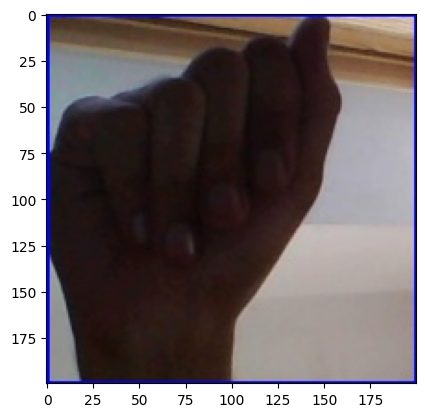

Imagen numero: 8
Dimensiones de la imagen: (200, 200, 3)


In [111]:
visualizar_imagen()

**Primeros Analisis (Entorno de trabajo):**


Las imagenes estan ordenadas por carpetas, las cuales se encuentran en el directorio: "/content/drive/MyDrive/ASL_Alphabet/".

Tanto las imagenes de entrenamiento como las de test se encuentran en:
"asl_alphabet_train/als_alphabet_train/..." y "asl_alphabet_test/asl_alphabet_test/...".

Dentro del directorio con los datos de entrenamiento, encontramos otras carpetas con referencias a letras y comandos.

Ejemplo: A_aux, B_Aux, del_aux, etc. Estas carpetas contienen las imagenes de las posiciones de la mano en lenguaje de señas(500 imagenes por carpeta).

Dentro del directorio de test, solo encontramos imagenes para probar el modelo una vez entrenado y evaluado.



**Primeros Analisis (formas y distribucion de los datos)**

Se ha descagado de Kaggle una serie de imagenes en lenguaje de señas, los cuales representan categorias de la A-Z y comandos como: del, nothing, space.

Tenemos un total de 500 imagenes por categoria, divididos en 29 carpetas dentro del directorio de train.

Estas imagenes, presentan un tamaño de 200x200 a color.
Por cada categoria, econtramos además, diferentes posiciones, aumentos, así como luminosidad en el ambiente.